# Project Report

### Title: Given these 13 factors, does the patient have heart disease?

1. `Age` **Age (years)** 

2. `Sex` **Sex**: 0 = female; 1 = male

3. `Chest_Pain_Type` **Chest pain type**: 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4: = asymptomatic
    - Angina is the medical term for chest pain caused by disruption of blood flow and oxygen to the heart
    - Typical angina refers to classical symptoms of chest pain including pressure, heaviness, tightness in chest
    - Atypical angina refers to chest pain that does not meet criteria for typical angina, where pain can be more localized and symptoms are less predictable than typical angina
    - Non-anginal pain refers to chest pain that is not caused by reduced blood flow to the heart 
    - Asymptomatic chest pain occurs when the heart does not receive enough blood however there are no physical symptoms 
\
&nbsp;
4. `Resting_Blood_Pressure` **Resting blood pressure (mmHg)**
    - Resting blood pressure of patients is measured in millimeters of mercury (mmHg)
\
&nbsp;
5. `Cholesterol` **Cholesterol (mg/dL)**
    - Cholesterol of patient measured in milligram per decilitre (mg/dL)
\
&nbsp;
6. `Fasting_Blood_Sugar` **Fasting blood sugar (> 120 mg/dL)**: 0 = false; 1 = true
    - False if fasting blood sugar is below or equal to 120 mg/dL
    - True if patients fasting blood sugar is above 120 mg/dL
    - Fasting blood sugar refers to the level of glucose in the blood after the patient has not eaten anything for a period of time
\
&nbsp;
7. `Resting_ECG` **Resting electrocardiographic measurement (ECG)**: 0 = normal resting ECG; 1 = abnormal resting ECG; 2 = possible left ventricular hypertrophy
    - Resting ECG test measures your resting heart’s rhythm and electrical signals each time it beats 
    - Normal resting ECG is the normal electrical activity or pattern of the heart that shows no significant abnormalities
    - Abnormal resting ECG will represent ST-T abnormality on ECG. This occurs when there are abnormalities in your normal ST-T waves that help your heart beat properly.
        - ST-T waves represents the period when your heart ventricles are preparing to contract again for the next heartbeat
    - Possible left ventricular hypertrophy (LVH) is based on Estes’ criteria, which is a set of guidelines used to interpret ECG results. LVH is a condition where the left walls of the heart become thickened and enlarged.
\
&nbsp;
8. `Max_Heart_Rate` **Maximum heart rate (bpm)**
    - Measured in beats per minute (bpm)
\
&nbsp;
9. `Exercise_Induced_Angina` **Exercise induced angina**: 0 = no; 1 = yes
    - Exercise induced angina is chest pain that occurs during physical exertion or stress 
\
&nbsp;
10. `ST_Depression` **ST depression induced by exercise relative to rest**
    - ST depression is a pattern seen on ECG that indicates decreased blood flow to heart muscle 
\
&nbsp;
11. `Slope` **Slope of the peak exercise ST segment**: 1 = upsloping; 2 = flat; 3 = downsloping
    - Slope of the peak exercise ST segment refers to the change in the ST segment collected from the ECG during exercise 
    - Slope is evaluated from rest and then the change in ST segment when the patient is exercising at maximum capacity is recorded
\
&nbsp;
12. `Number_of_Major_Vessels` **Number of major vessels**
    - Major blood vessels carry blood to and from heart 
    - Ranges from 0-3, colored by fluoroscopy to determine number of major vessels
\
&nbsp;
13. `Thal` **Thalassemia**: 3 = normal; 6 = fixed defect; 7 = reversible defect
    - Thalassemia is a genetic blood disorder that results in reduced hemoglobin in red blood cells. This causes red blood cells to carry less oxygen to the heart and throughout the body
    - Fixed defect refers to no blood flow in an area of heart muscle
    - Reversible defect refers to reduced blood flow in an area of heart muscle
\
&nbsp;
14. `Heart_Disease_Diagnosis` **Heart disease diagnosis**: 0 = < 50% diameter narrowing (Healthy) ; 1 = > 50% diameter narrowing (*Heart Disease*)
    - Heart disease diagnosis is based on angiographic disease status that uses an angiogram to visualize blood vessels in the heart
    - Angiographic disease status measures the degree of narrowing in coronary arteries, where a diameter narrowing of less than 50% is considered mild or insignificant, and higher is considered significant and may require treatment.
    

## Introduction

Heart disease encompasses a group of conditions that can impair the structure or function of the heart. There are risk factors that increase heart disease that cannot be controlled such as sex, age, and genetics. The Heart Disease dataset from the UCI Machine Learning Repository examines the relationship between  13 factors and their effect on heart disease. The objective of our project is to examine some of these potential factors to identify patterns and make predictions that answer our research question: Given these 13 factors, does the patient have heart disease? 

## Methods and Results

### Preliminary exploratory data analysis

In [18]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)
library(RColorBrewer)
library(cowplot)
set.seed(1)

In [19]:
cleveland <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_Blood_Sugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
cleveland <- cleveland |>
    mutate(Number_of_Major_Vessels = as.numeric(Number_of_Major_Vessels)) |>
    mutate(Thal = as.numeric(Thal))       

calc_mode <- function(x){
  
  # List the distinct / unique values
  distinct_values <- unique(x)
  
  # Count the occurrence of each distinct value
  distinct_tabulate <- tabulate(match(x, distinct_values))
  
  # Return the value with the highest occurrence
  distinct_values[which.max(distinct_tabulate)]
}

cleveland <- cleveland |>
  mutate(across(everything(), ~replace_na(.x, calc_mode(.x))))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


### Exploring the entire dataset

In [20]:
cleveland <- cleveland  |>
    mutate(
        Heart_Disease_Diagnosis = case_when(
                Heart_Disease_Diagnosis != 0 ~ 1,
                Heart_Disease_Diagnosis == 0 ~ 0
            )
        )
cleveland <- cleveland  |>
    mutate(
        Heart_Disease_Diagnosis = as.factor(Heart_Disease_Diagnosis)
        )    
head(cleveland)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


**Table 1.** First 6 observations of Cleveland dataset

In [21]:
tail(cleveland)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


**Table 2.** Last 6 observations of Cleveland dataset

### Splitting the data into training and testing sets

In [22]:
set.seed(1)
data_split <- initial_split(cleveland, prop = 0.75, strata = Heart_Disease_Diagnosis)
training_data <- training(data_split)
testing_data <- testing(data_split)
head(training_data)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0


**Table 3.** First 6 observations of training data.

In [23]:
tail(training_data)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,3,152,212,0,2,150,0,0.8,2,0,7,1
63,1,4,140,187,0,2,144,1,4.0,1,2,7,1
59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


**Table 4.** Last 6 observations of training data.

## Summary Tables

#### Mean Table For Numerical Variables

In [24]:
##MEAN TABLE FOR NUMERICAL VARIABLES##

mean_table1 <- training_data |>
    filter(Heart_Disease_Diagnosis == 1) |>
    select(Age, Resting_Blood_Pressure, Cholesterol, Max_Heart_Rate, ST_Depression) |>
    colMeans(na.rm = TRUE) 

mean_table1.matrix = matrix(data = mean_table1, nrow = 1, byrow = TRUE)
mean_table1.df = as.data.frame(mean_table1.matrix)
colnames(mean_table1.df) = c("Age", "Resting_Blood_Pressure", "Cholesterol", "Max_Heart_Rate", "ST_Depression")

mean_table1 = mean_table1.df 

mean_table1 <- mean_table1 |>
    pivot_longer(cols = Age:ST_Depression, names_to = "Variable", values_to = "Mean for Heart Disease Patients") 

mean_table2 <- training_data |>
    filter(Heart_Disease_Diagnosis == 0) |>
     select(Age, Resting_Blood_Pressure, Cholesterol, Max_Heart_Rate, ST_Depression) |>
    colMeans(na.rm = TRUE)

mean_table2.matrix = matrix(data = mean_table2, nrow = 1, byrow = TRUE)
mean_table2.df = as.data.frame(mean_table2.matrix)
colnames(mean_table2.df) = c("Age", "Resting_Blood_Pressure", "Cholesterol", "Max_Heart_Rate", "ST_Depression")
mean_table2 = mean_table2.df 

mean_table2 <- mean_table2 |>
    pivot_longer(cols = Age:ST_Depression, names_to = "Variable2", values_to = "Mean for Healthy Patients")

mean_table <- bind_cols(mean_table1, mean_table2) |>
    select(1, 2, 4) |>
    mutate("Heart Disease Mean : Healthy Patients Mean" = `Mean for Heart Disease Patients`/
           `Mean for Healthy Patients`)

mean_table

Variable,Mean for Heart Disease Patients,Mean for Healthy Patients,Heart Disease Mean : Healthy Patients Mean
<chr>,<dbl>,<dbl>,<dbl>
Age,57.230769,52.9674797,1.0804888
Resting_Blood_Pressure,135.509615,130.4552846,1.0387438
Cholesterol,250.567308,243.9105691,1.0272917
Max_Heart_Rate,138.230769,158.6747967,0.8711577
ST_Depression,1.544231,0.6170732,2.5025084


**Table 5.** Means of the potential numerical predictor variables for heart disease patients and healthy patients.

#### What the means tell us

The means give a measure of the center for each variable as well as a basis for comparison between heart disease and healthy patients, which will be helpful in selecting predictor variables. A big difference between the means of a variable indicates that such variable is likely to drive the classification and therefore should be selected as a predictor variable. The ratios of means (disease:healthy) have also been tabulated so that a comparison of means is more objective, as it is difficult to judge the mean differences when they are in their original units.

#### Mode Table For Discrete Variables

In [25]:
##MODE TABLE FOR DISCRETE VARIABLES##

mode_table1 <- training_data |>
    filter(Heart_Disease_Diagnosis == 1) |>
    select(Sex, Chest_Pain_Type, Fasting_Blood_Sugar, Resting_ECG, Exercise_Induced_Angina, Slope, Number_of_Major_Vessels, Thal) |>
    map_df(calc_mode) 

mode_table1.matrix = matrix(data = mode_table1, nrow = 1, byrow = TRUE)
mode_table1.df = as.data.frame(mode_table1.matrix)
colnames(mode_table1.df) = c("Sex", "Chest_Pain_Type", "Fasting_Blood_Sugar", "Resting_ECG", "Exercise_Induced_Angina", "Slope", "Number_of_Major_Vessels", "Thal")

mode_table1 = mode_table1.df 

mode_table1 <- mode_table1 |>
    pivot_longer(cols = Sex:Thal, names_to = "Variable", values_to = "Heart Disease Mode") 

mode_table2 <- training_data |>
    filter(Heart_Disease_Diagnosis == 0) |>
     select(Sex, Chest_Pain_Type, Fasting_Blood_Sugar, Resting_ECG, Exercise_Induced_Angina, Slope, Number_of_Major_Vessels, Thal) |>
    map_df(calc_mode)

mode_table2.matrix = matrix(data = mode_table2, nrow = 1, byrow = TRUE)
mode_table2.df = as.data.frame(mode_table2.matrix)
colnames(mode_table2.df) = c("Sex", "Chest_Pain_Type", "Fasting_Blood_Sugar", "Resting_ECG", "Exercise_Induced_Angina", "Slope", "Number_of_Major_Vessels", "Thal")
mode_table2 = mode_table2.df 

mode_table2 <- mode_table2 |>
    pivot_longer(cols = Sex:Thal, names_to = "Variable2", values_to = "Healthy Patients Mode")

mode_table <- bind_cols(mode_table1, mode_table2) |>
    select(1, 2, 4)

mode_table

Variable,Heart Disease Mode,Healthy Patients Mode
<chr>,<list>,<list>
Sex,1,1
Chest_Pain_Type,4,3
Fasting_Blood_Sugar,0,0
Resting_ECG,2,0
Exercise_Induced_Angina,1,0
Slope,2,1
Number_of_Major_Vessels,1,0
Thal,7,3


**Table 6.** Modes of the potential discrete predictor variables for heart disease patients and healthy patients.

#### What the mode tell us

Visualizing the mode differences between the healthy and heart disease groups gives us a useful first look as to the variables that may drive classification. A difference in the modes between the healthy and diseased patients tells us that these variables may drive classification. However, taking the mode disregards a lot of useful data. So, we will be using a slightly difference approach for selecting discrete variables (see *Variable Selection*).

#### Training Dataset Label Proportions

In [26]:
proportions <- training_data |>
               group_by(Heart_Disease_Diagnosis) |>
               summarize(count = n())

proportions

Heart_Disease_Diagnosis,count
<fct>,<int>
0,123
1,104


**Table 7.** Proportion of healthy and heart diseased patients in the training data set (Diagnosis of 0 means healthy, diagnosis of 1 means prescence of heart disease)

#### What the proportions tell us:

Having a balanced number of classes helps improve the accuracy of the predictor. More specifically, if you don't have a balanced number of predictors, the classifier may be inaccurate in predicting the minority class. In *Table 7*, we can see that our classes are relatively balanced (54/46). 

### Variable Selection

#### Numerical Variables

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.


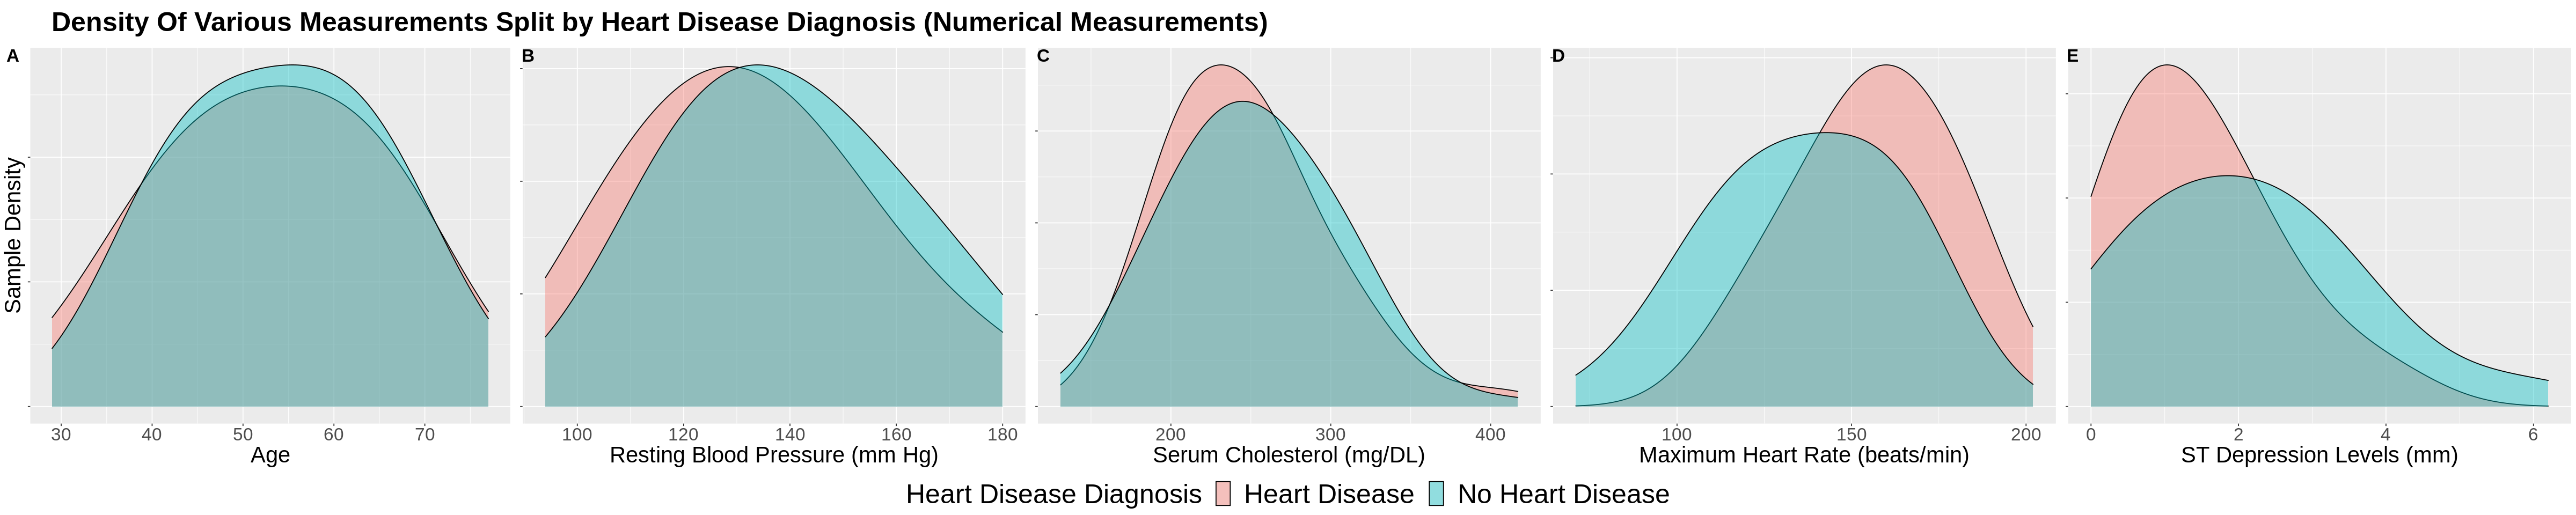

In [27]:
options(repr.plot.width=40, repr.plot.height=8)

##Numerical VARIABLES##

##AGE##

heart_age_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_combined <- rbind(heart_age_table0, heart_age_table1)
#heart_age_combined

heart_age_plot <- ggplot(heart_age_combined, aes(x = Age, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Age", y = "Sample Density", fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs Age") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank()) 
                 
##RBP##

heart_bp_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_combined <- rbind(heart_bp_table0, heart_bp_table1)
#heart_bp_combined

heart_bp_plot <- ggplot(heart_bp_combined, aes(x = Resting_Blood_Pressure, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Resting Blood Pressure (mm Hg)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs \nResting Blood Pressure") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##CHOLESTEROL##

heart_chol_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_combined <- rbind(heart_chol_table0, heart_chol_table1)

heart_chol_plot <- ggplot(heart_chol_combined, aes(x = Cholesterol, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Serum Cholesterol (mg/DL)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs \nSerum Cholesterol") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##MAX HEART RATE##

heart_hr_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_combined <- rbind(heart_hr_table0, heart_hr_table1)

heart_hr_plot <- ggplot(heart_hr_combined, aes(x = Max_Heart_Rate, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Maximum Heart Rate (beats/min)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                 #ggtitle("Density of People With and \nWithout Heart Disease Vs \nMaximum Heart Rate") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##DEPRESSION#

heart_st_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_combined <- rbind(heart_st_table0, heart_st_table1)

heart_st_plot <- ggplot(heart_st_combined, aes(x = ST_Depression, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "ST Depression Levels (mm)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                 #ggtitle("Density of People With and \nWithout Heart Disease Vs \nMaximum Heart Rate") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


###
title <- ggdraw() +
         draw_label('Density Of Various Measurements Split by Heart Disease Diagnosis (Numerical Measurements)',
                   fontface = 'bold',
                   x = 0.02,
                   hjust = 0,
                   size = 30) 

             
cont_grid <- plot_grid(heart_age_plot, heart_bp_plot, heart_chol_plot, heart_hr_plot, heart_st_plot, 
                       ncol = 5, labels = c('A', 'B', 'C', 'D', 'E'), label_size = 20) 

legend_bottom <- get_legend(heart_age_plot + guides(color = guide_legend(now=1)) +
                            theme(legend.position = 'bottom', legend.text = element_text(size = 30), legend.title = element_text(size = 30)))

plot_grid(title, cont_grid, legend_bottom, ncol = 1, rel_heights = c(0.1, 1))

**Figure 1.** Density plots of continuous variables including A) age, B) resting blood pressure, C) serum cholesterol, D) Maximum heart rate, and E) ST depression levels of patients. Heart disease patients are represented by the red density function and healthy patients are represented by the blue density function.

### Continuous Variable Selection (Density Figure 1 A-E Above)

We will be selecting our numerical variables based on the visualizations and table above.  We will be looking at our density plots to see which variables show minimal overlap between the heart disease/healthy conditions, as more overlap indicates that the variable in question does not play a major role in distinguishing healthy patients from heart disease patients. To reinforce our choices for numerical variables through quantification, we will be comparing the ratio of means (disease:healthy). Ratios that notably differ from 1 (we have chosen that the ratios must be larger than 1.10 or less than 0.90) indicate that the variable in question plays a large role in distinguishing diseased patients from healthy patients. Our choices for the continuous variables are below.

**Chosen numerical variables:**
 - Maximum Heart Rate
 - ST Depression Levels
 
**Omitted numerical variables:**
 - Age
 - Resting Blood Pressure
 - Serum Cholesterol

**Reasoning:**

The density plots showed relatively low overlap of each of the variables (between the heart disease and no heart disease subsets) for Maximum Heart Rate and ST Depression Levels, but relatively higher overlap for the other numerical variables. These choices are reinforced by the mean table we created, which shows that the disease:healthy was less than 1.10 (for Age, Resting Blood Pressure, and Serum Cholesterol). This high overlap in the density plots and low disease:healthy ratio indicates that these variables do not play a major role in distinguishing diseased patients from healthy patients.


### Discrete Variabes

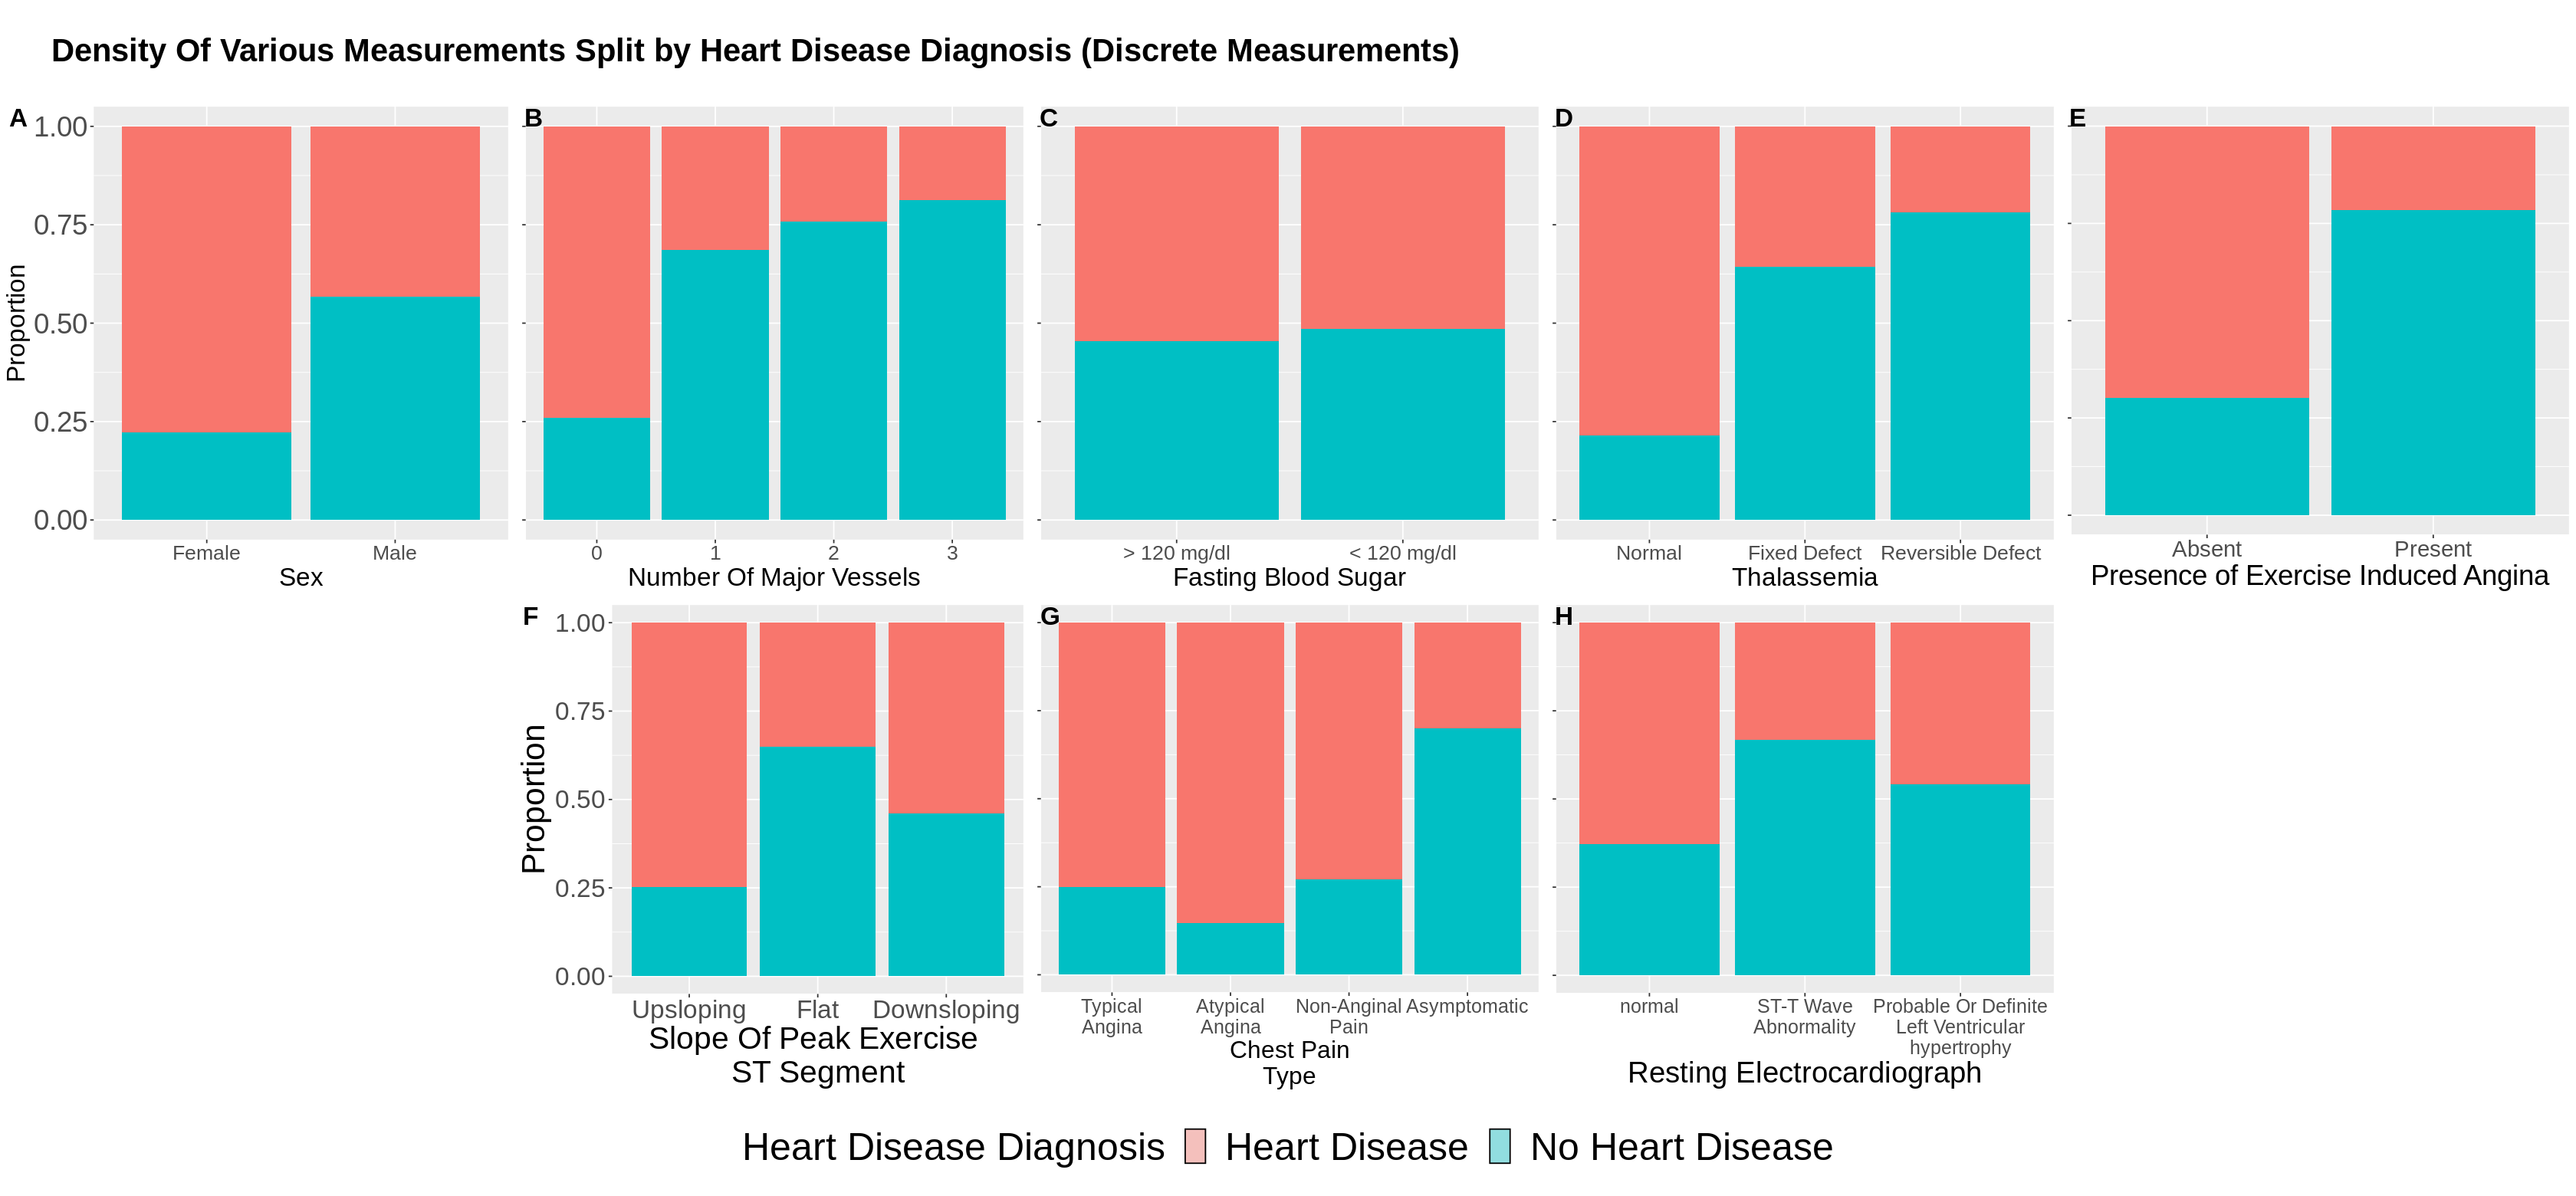

In [28]:
##DISCRETE VARIABLES##
options(repr.plot.width=28, repr.plot.height=13)

sex_plot <- training_data |>
   ggplot(aes(x = as.factor(Sex), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Sex", y = "Proportion", fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Female', 'Male')) +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_text(size = 22)) 

cp_type_plot <- training_data |>
   ggplot(aes(x = as.factor(Chest_Pain_Type), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Chest Pain\nType", 
        y = NULL, fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Typical\nAngina', 'Atypical\nAngina', 'Non-Anginal\nPain', 'Asymptomatic')) +
                 theme(axis.title.x = element_text(size = 19), axis.text.x = element_text(size = 15), legend.position = 'none', axis.text.y = element_blank())

fbs_plot <- training_data |>
   ggplot(aes(x = as.factor(Fasting_Blood_Sugar), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Fasting Blood Sugar", 
        y = NULL, fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('> 120 mg/dl', '< 120 mg/dl')) +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

restecg_plot <- training_data |>
   ggplot(aes(x = as.factor(Resting_ECG), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Resting Electrocardiograph",
        y = NULL, fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('normal', 'ST-T Wave\nAbnormality', 'Probable Or Definite\nLeft Ventricular\nhypertrophy')) +
                 theme(axis.text.x = element_text(size = 15), axis.title.x = element_text(size = 23), legend.position = 'none', 
                       axis.text.y = element_blank())

bar_plot9 <- training_data |>
   ggplot(aes(x = as_factor(Exercise_Induced_Angina), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Presence of Exercise Induced Angina") +
   ylab(NULL) +
   labs(fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Absent', 'Present')) +
                 theme(text = element_text(size = 22), legend.position = 'none', axis.text.y = element_blank())

bar_plot11 <- training_data |>
   ggplot(aes(x = as_factor(Slope), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Slope Of Peak Exercise \nST Segment") +
   ylab('Proportion') +
   labs(fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Upsloping', 'Flat', 'Downsloping')) +
                 theme(axis.title.x = element_text(size = 24.5), axis.title.y = element_text(size = 25.5), axis.text.x = element_text(size = 20),
                       legend.position = 'none', axis.text.y = element_text(size = 20))

bar_plot12 <- training_data |>
   filter(!is.na(Number_of_Major_Vessels)) |>
   ggplot(aes(x = as_factor(Number_of_Major_Vessels), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Number Of Major Vessels") +
   ylab(NULL) +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

bar_plot13 <- training_data |>
   filter(!is.na(Thal)) |>
   ggplot(aes(x = as_factor(Thal), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Thalassemia") +
   ylab(NULL) +
                 scale_x_discrete(labels = c('Normal', 'Fixed Defect', 'Reversible Defect')) +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

cont_grid1 <- plot_grid(sex_plot, bar_plot12, fbs_plot, bar_plot13, bar_plot9, NULL, bar_plot11, cp_type_plot, restecg_plot, NULL,
                       labels = c('A', 'B', 'C', 'D', 'E', ' ', 'F', 'G', 'H'), label_size = 20,  
                       ncol = 5) 
title1 <- ggdraw() +
         draw_label('Density Of Various Measurements Split by Heart Disease Diagnosis (Discrete Measurements)',
                   fontface = 'bold',
                   x = 0.02,
                   hjust = 0,
                   size = 25) 
plot_grid(title1, cont_grid1, legend_bottom, ncol = 1, rel_heights = c(0.1, 1))

**Figure 2.** Bar charts of discrete variables including A) sex, B) chest pain type, C) fasting blood sugar, D) resting electrocardiograph, E) presence of exercise induced angina, F) slope of peak exercise ST segment, G) number of major blood vessels and H) thalassemia of patients is shown. Heart disease diagnosis for each variable is displayed as a proportion where red represents the proportion of patients with heart disease and blue represents the proportion of patients with no heart disease.

### Discrete Variable Selection (Figure 2 A-H Above)

We will be selecting our discrete variables based on a different criteria compared to the numerical ones - we will be looking at the proportion of diseased and healthy patients in each level of the discrete variable. If any of the variable’s levels have proportions that notably differ from a 50/50 proportion, then we will use it (e.g. if a variable has 4 levels, and 3 of them are 50/50, but the 4th one is 90/10, then we will use that variable as a predictor variable). The reason for this is because the variable still plays a major role in distinguishing diseased patients from healthy patients. When a particular category of the discrete variable deviates from a 50/50 proportion, this variable will strongly influence classification of whether a patient is healthy or has heart disease. (e.g. continuing on the variable from the previous example, if an observation has the 4th level for that variable, then that variable can help distinguish diseased/healthy patients). Our choices for the discrete variables are below.

**Chosen discrete variables:**
    
 - Sex
 - Chest Pain Type
 - Resting Electrocardiograph
 - Presence of Exercise Induced Angina
 - Slope of Peak Exercise ST Segment
 - Number of Major Vessels Colored By Fluoroscopy
 - Thalassemia
 
**Omitted discrete variables:**

 - Fasting Blood Sugar
 
These choices follow the same logic as mentioned above. Fasting blood sugar was the only discrete variable that had all of its levels close to a 50/50 proportion between diseased and healthy patients. 


### Final Variable Choices For Our Model
- Sex
- Chest Pain Type
- Resting Electrocardiograph
- Presence of Exercise Induced Angina
- Slope of Peak Exercise ST Segment
- Number of Major Vessels Colored By Fluoroscopy
- Thalassemia
- Maximum Heart Rate
- ST Depression Levels

**High-level analysis of chosen variables:**

- 9/13 of the original factors were selected to be used in the KNN algorithm
- 2/9 of the chosen variables are numerical
- 7/9 of the chosen variables are discrete

### KNN Classifier Build 

#### 5-fold Cross-Validation

In [29]:
vFold <- vfold_cv(training_data, v = 5, strata = Heart_Disease_Diagnosis)

spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
      set_mode("classification")

myRecipe <- recipe(Heart_Disease_Diagnosis ~ Max_Heart_Rate + ST_Depression + Sex + Chest_Pain_Type + Resting_ECG + Exercise_Induced_Angina + Slope + Number_of_Major_Vessels + Thal, data = training_data) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

kValues  <- tibble(neighbors = seq(from = 1, to = 150, by = 5))
                   
results <- workflow() |>
    add_recipe(myRecipe) |>
      add_model(spec) |>
      tune_grid(resamples = vFold, grid = kValues) |>
      collect_metrics() |>
     filter(.metric == "accuracy")
head(results, 6)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7710760,5,0.04377273,Preprocessor1_Model01
6,accuracy,binary,0.7883663,5,0.02485127,Preprocessor1_Model02
11,accuracy,binary,0.8410277,5,0.01698612,Preprocessor1_Model03
16,accuracy,binary,0.8411243,5,0.01667795,Preprocessor1_Model04
21,accuracy,binary,0.8501186,5,0.01314572,Preprocessor1_Model05
26,accuracy,binary,0.8501186,5,0.02136268,Preprocessor1_Model06


**Table 8.** First 6 rows of results dataframe, which shows a variety of descriptive metrics for each K value (each row).

In [30]:
tail(results, 6) 

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
121,accuracy,binary,0.8147475,5,0.02585871,Preprocessor1_Model25
126,accuracy,binary,0.8103030,5,0.02863501,Preprocessor1_Model26
131,accuracy,binary,0.8103996,5,0.02282868,Preprocessor1_Model27
136,accuracy,binary,0.8104963,5,0.01913712,Preprocessor1_Model28
141,accuracy,binary,0.8106939,5,0.01998124,Preprocessor1_Model29
146,accuracy,binary,0.8019982,5,0.01479534,Preprocessor1_Model30


**Table 9.** Last 6 rows of results dataframe, which shows a variety of descriptive metrics for each K value (each row).

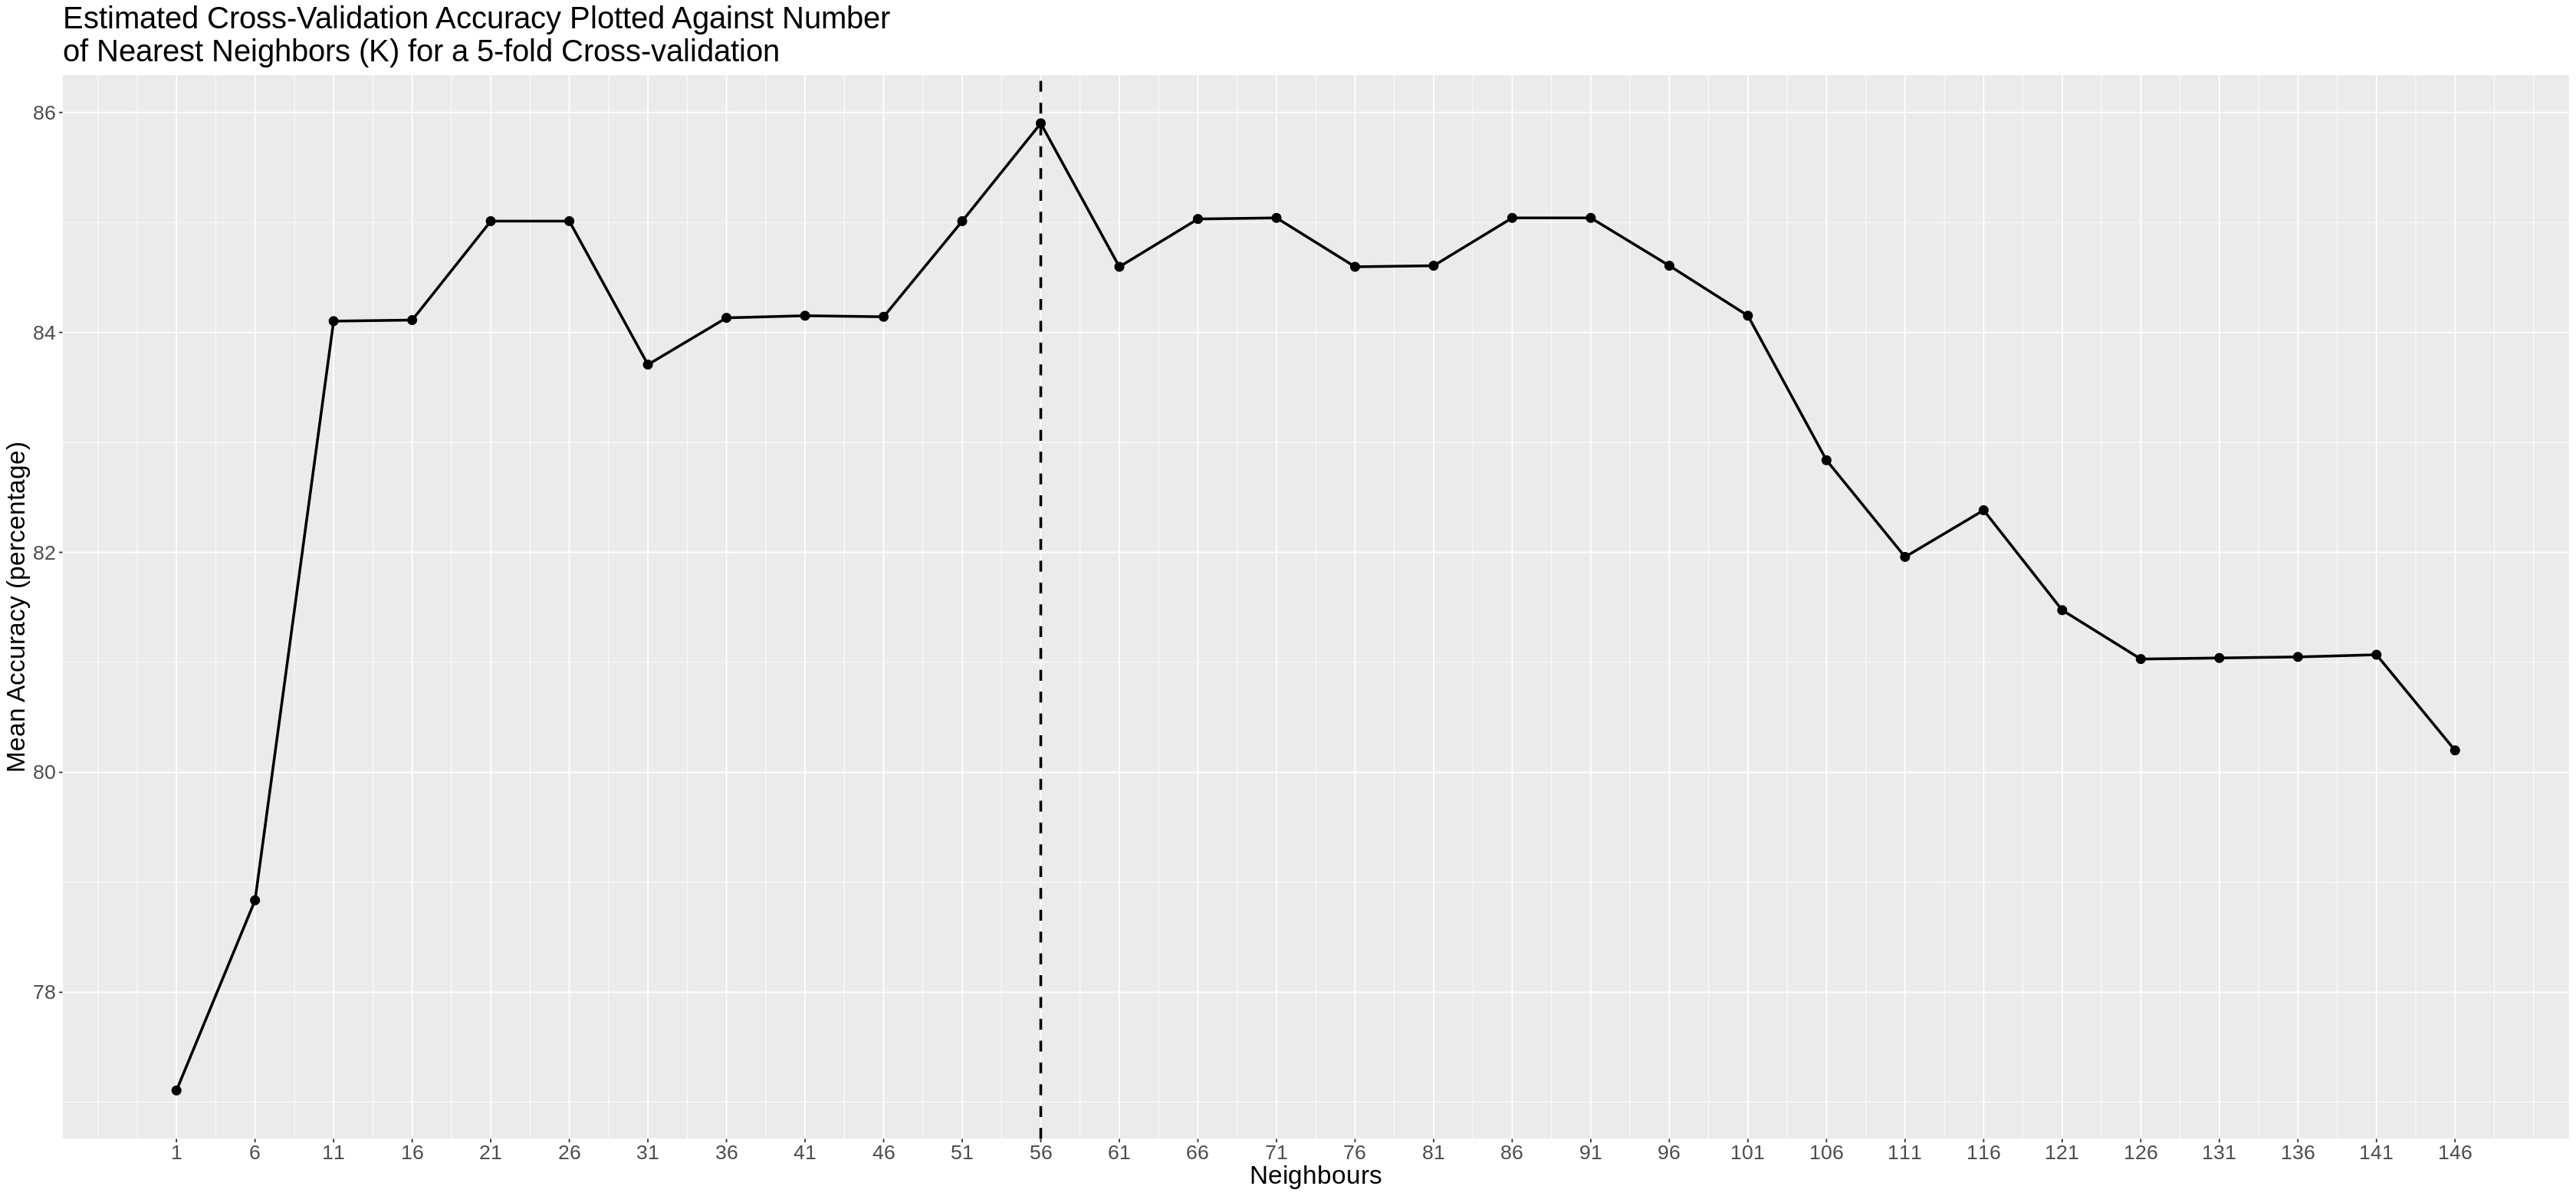

In [31]:
highest_accuracy <- results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors, mean)

cross_val_plot <- ggplot(results, aes(x = neighbors, y = 100 * mean)) +
                          geom_point(size = 3) +
                          geom_line(size = 1) +
                          labs(x = "Neighbours", y = "Mean Accuracy (percentage)") +
                          theme(text = element_text(size = 20)) +
                          scale_x_continuous(breaks = seq(1, 150, by = 5)) +
                          geom_vline(xintercept = highest_accuracy, linetype = "dashed", size = 1) +
                          ggtitle('Estimated Cross-Validation Accuracy Plotted Against Number \nof Nearest Neighbors (K) for a 5-fold Cross-validation')
cross_val_plot

**Figure 3.** Cross-validation plot which shows the mean accuracy of 9 predictors (see Variable Selection for the specific predictors) versus the number of neighbours. Dashed line displays the best number of neighbours (based on highest accuracy).

### Cross Validation Results

Through our 5-fold cross-validation, we found that the number of neighbors that yields the highest mean accuracy across our validation sets is 56. The mean accuracy for this K was 85.90%. Not only does K = 56 yield the highest accuracy, but an increase or decrease in K does not significantly alter the accuracy (adding/subtracting 5 neighbors changed the accuracy by ~1%). This is an important point to consider, as it shows that our choice is reliable and not simply a high accuracy due to noise. This K value is also ideal when considering computational power, as it is not too large.

Now that we have selected our K value, we will train our model on our training dataset using K = 56.

### Testing The Model

In [32]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = highest_accuracy) |>
      set_engine("kknn") |>
      set_mode("classification")

final_fit <- workflow() |>
      add_recipe(myRecipe) |>
      add_model(final_spec) |>
      fit(data = training_data)

final_predictions <- predict(final_fit , testing_data) |>
    bind_cols(testing_data)
final_metrics <- final_predictions |>
    metrics(truth = Heart_Disease_Diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy")
final_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8552632


**Table 10.** Metrics table that displays the classifier's accuracy on testing data, as shown by the proportion under the '.estimate' column.

#### Interpretation of Table 10

The metrics table displays the accuracy of our KNN model on the testing data. As seen under the .estimate column, **the model's overall accuracy is 85.55%**, which means that classifier correctly predicted if a patient had heart disease or not 85.55% of the time.

### Confusion Matrix

In [33]:
heart_confusion <- final_predictions |>
                    conf_mat(truth = Heart_Disease_Diagnosis, estimate = .pred_class) 

groups <- c('True Negative', 'False Negative', 'False Positive', 'True Positive')

heart_confusion_df <- as.data.frame(heart_confusion$table) |>
                   cbind(groups)

heart_confusion

          Truth
Prediction  0  1
         0 39  9
         1  2 26

**Table 11.** Confusion matrix showing the correct and incorrect predictions between each predicted class (healthy vs heart diseased patients).

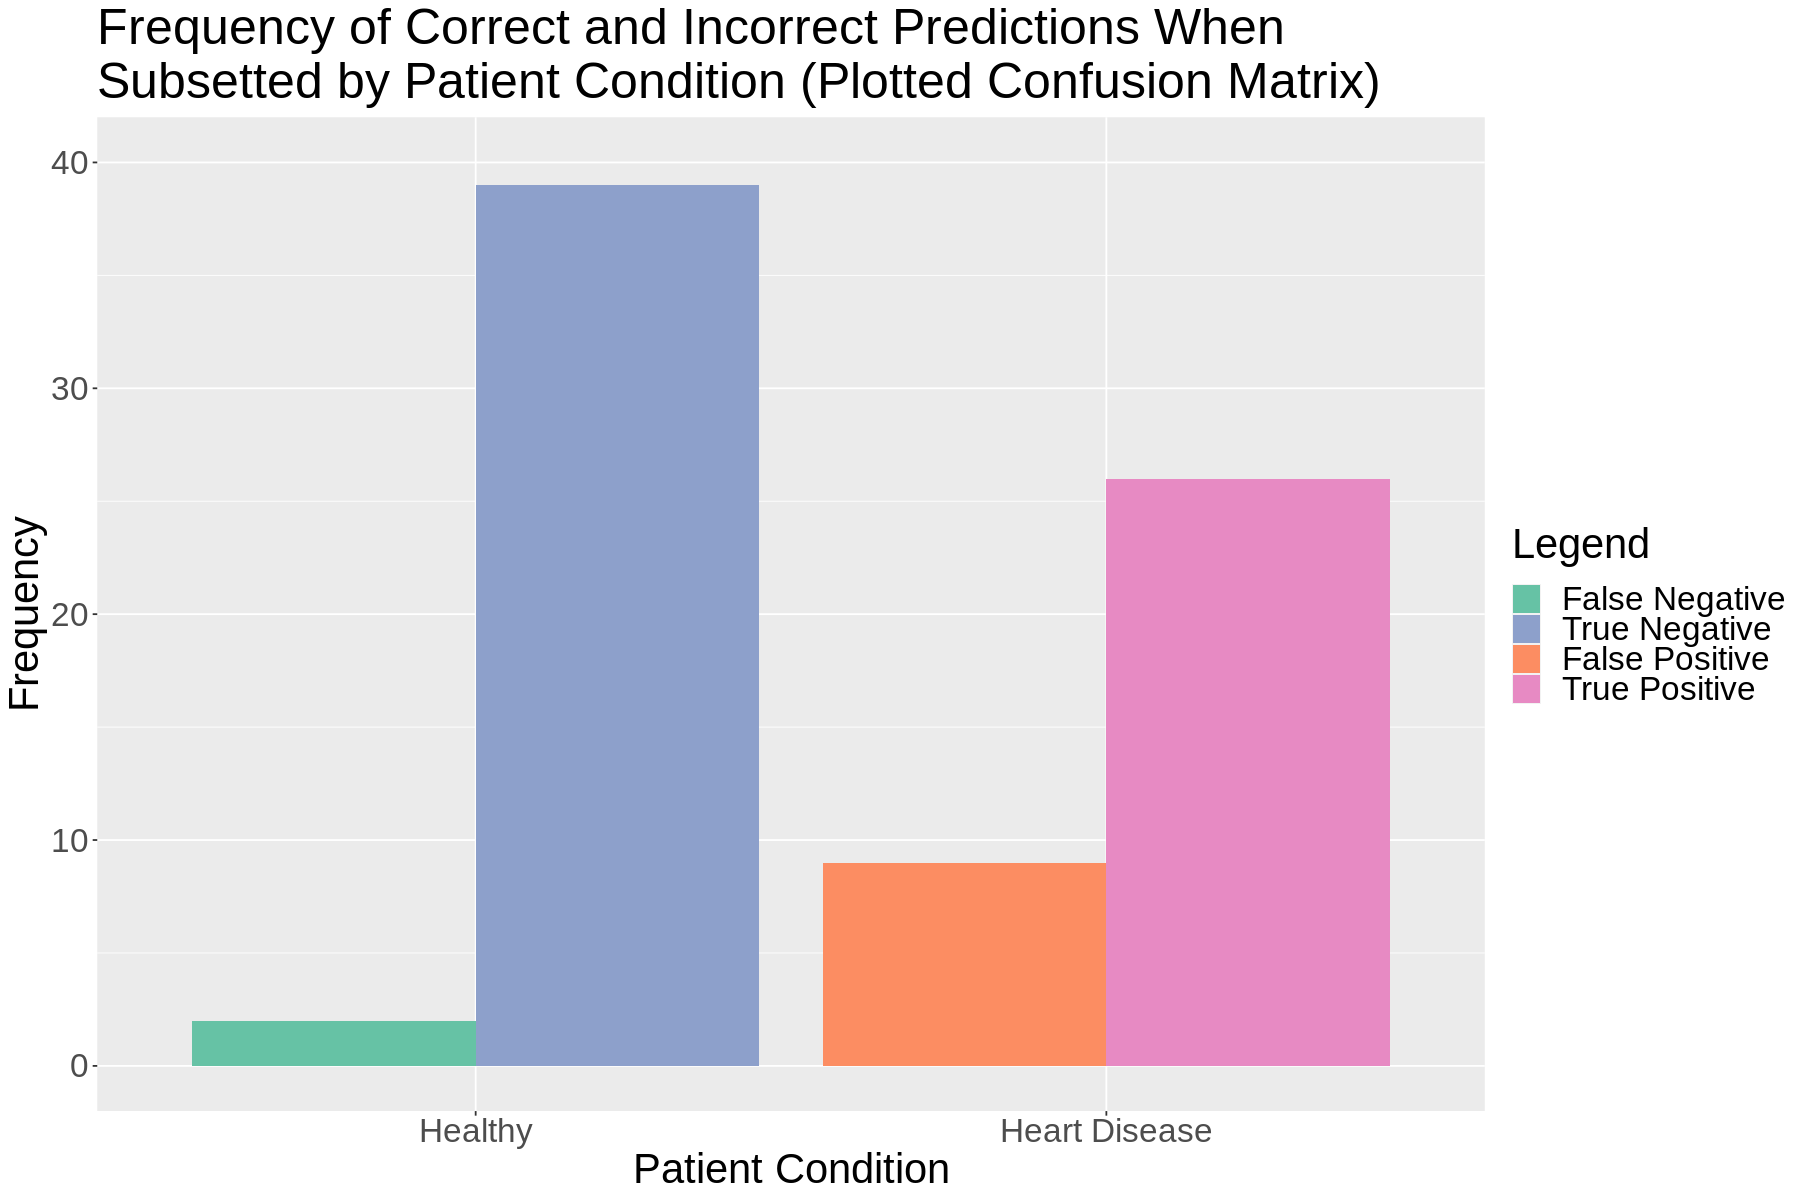

In [34]:
options(repr.plot.width=15, repr.plot.height=10)

conf_plot <- ggplot(heart_confusion_df, aes(x = as.factor(Truth), y = Freq, fill = groups)) +
             geom_bar(stat = 'identity', position = 'dodge') +
             labs(x = 'Patient Condition', y = 'Frequency', fill = 'Legend') +
             scale_x_discrete(labels = c('Healthy', 'Heart Disease')) +
             ggtitle('Frequency of Correct and Incorrect Predictions When \nSubsetted by Patient Condition (Plotted Confusion Matrix)') +
             scale_y_continuous(limits=c(0, 40)) +
             theme(text = element_text(size = 25)) +
             scale_fill_brewer(palette = "Set2", breaks = c('False Negative', 'True Negative', 'False Positive', 'True Positive'))

conf_plot

**Figure 4.** Dodged bar graph representation of the confusion matrix (table 11). The plot shows the model's frequency of disease predictions for both heart diseased and healthy (no heart disease) patients. The total number of healthy patients is 41 (corresponding to the two dodged bars on the left. The total number of diseased patients is 35 (corresponding the the two dodged bars on the right).

#### Interpretation of the confusion matrix (*Figure 3* and *Table 11*)

**What is seen:**

- The overall accuracy of the predictions on healthy patients is 95.12% (39/41)
- The overall accuracy of the predictions on diseased patients is 74.28% (26/35)
- We have more false positives compared to false negatives

**What this means:**

- Our model was better at predicting the condition of healthy patients compared to diseased patients.

**Why this might have happened:**

- In KNN classification, an imbalance in prediction accuracy among two different classes can be due to an imbalance in the proportion of the two classes in the training set. However, the classes (diseased patients vs no disease patients) were relatively balanced in our training set, with a 54/46 split between both classes (*Table 7*). So class imbalance in the training set is unlikely the reason for this imbalance in prediction accuracy.
- One theory as to why there are far more false positives than false negatives might be because the original cleveland dataset had the column for heart disease diagnosis broken up into categories 0 (no heart disease present) and 1,2,3,4 (heart disease present). In our pre-processing steps, we merged any row that signified heart disease diagnosis (1, 2, 3 or 4) into one group to indicate presence of heart disease. This can be a possible reason as to why the classifier is able to predict 0’s (no presence of heart disease) more accurately than 1’s (presence of heart disease).

**Why this matters:**

- When building a classifier to predict medical conditions, the cost of make a false negative is high. This is basically equivalent to a doctor telling a patient that they are healthy when they actually have heart disease. It is important to note that the accuracy for heart diseased patients was lower than the overall accuracy, as it gives us the ability to critically analyze the suitability of our classifier in real-world scenarios.

# Discussion

### **Summary of what we found:**

Initially, we asked: ‘given these 13 factors, does the patient have heart disease?’ Through the classifier we made, we used 9 out of the 13 factors (see *Variable Selection*) to predict whether a patient has heart disease with a 85.53% accuracy on our testing set (see *Testing The Model*). While this accuracy initially seems strong, we decided to look at the confusion matrix. Our confusion matrix shows that the model predicted the condition of healthy patients with 95.12% accuracy, while it predicted the condition of heart diseased patients with a 74.28% accuracy (*Table 11*, *Figure 4*). This demonstrates that the model made far more false positives than false negatives (see *Interpretation of Confusion Matrix* for an interpretation of this effect).

### **Is this what we expected to find?**

We were expecting to find that the 13 variables that were a part of the cleveland dataset would be able to accurately classify patients as heart diseased or healthy. In order to limit unnecessary computational power and to maximize the performance of the classifier, our exploratory analysis indicated that only 9 of these variables may be useful to our classifier. This was unexpected to us, as these 4 omitted variables seemed like relevant predictors for heart disease. For example, we initially expected that the older you are, the more likely you would be to have heart disease. However, our graphical and tabular analysis (*Table 5*, *Figure 1*) did not support this hypothesis as there was no clear association between age and the diagnosis of patients. We also had some expected results. For example, we can see that males are more likely to get heart disease (*Figure 2*), which is supported by previous research. With our chosen 9 variables, our model did in fact show that it was able to extract some useful information as the overall accuracy was higher than the accuracy that a majority classifier would get (this would be ~54% - the percent prevalence of our majority class).

### **What are the impacts of these findings?**

Whether or not having more false positives than false negatives is good or bad is not a question with a black or white answer - it usually depends on the context. For this dataset, we believe that it is better to have fewer false negatives, which means that we want to focus on limiting the number of times the classifier diagnoses a heart diseased patient as healthy. This will ensure that the doctors can act quickly to treat it, potentially saving the patient's life. At the same time, a higher degree of false positives means that needless stress and resources will be spent treating a patients that does not actually have any heart condition. However, we believe that this is a necessary sacrifice, as wasting some resources to ensure all patients are safe is better than missing diagnoses that can lead to fatalities. Although the classifier tends to have more false negatives, it could still be useful to help reduce the strain on the healthcare system if resources are scarce. Ultimately, this can severely help places that are suffering from a doctor shortage such as right here in BC since it can reduce the workload on doctors, and provide them with another tool so that they can make more informed decision/diagnoses.

### **What future questions could this lead to?**

How could a future classifier be improved? Evidently, it would be best if the overall accuracy was higher. This could be achieved by having a larger dataset as the one we used is relatively small (only 303 rows) and relatively old (donated to the archive ML site in 1988 so it may not even be as applicable to the current population). Or perhaps, running a smarter predictor variable selection (a more complicated method we have not learned) on all 75 attributes that were a part of the original dataset could improve the overall accuracy. However, it is also understandable why the classifier does not have an extremely high degree of accuracy. If we examine the plots for our variables that were used to choose predictors, we can see for some continuous variable density plots there is still a significant degree of overlap between heart disease and no heart disease, which makes distinguishing between the two conditions difficult, but that does not mean that we should stop trying. A summary of some future questions:

- How would the classifier's accuracy change if we used data from the current population (2023) using the same metrics (variables)?
- How would the classifier's accuracy change if we used a more complex method of predictor variable selection?
- Would the number of false negatives be reduced if we didn't initially group the heart disease diagnosis variable (1,2,3,4 -> 1)?
- What role does this classifier have in the healthcare system? If we work on the limitations of our classifier, will it be able to predict heart diseased patients better than a physician?

## References
- "Types of heart diseases." Heart and Stroke Foundation of Canada, 2023, https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease
- "Throughout life, heart attacks are twice as common in men than women." Harvard Health, 8 Nov. 2016, https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women
- "How to Replace NA’s with the Mode (Most Frequent Value) in R." Coding Prof, 11 Aug. 2021, https://www.codingprof.com/how-to-replace-nas-with-the-mode-most-frequent-value-in-r/
- Janosi, Steinbrunn, Pfisterer, Dua, Graff, and Robert Detrano. "Heart Disease Data Set." UCI Machine Learning Repository, 2019, https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- Skrypnek, Jane. "Amid a chronic shortage, B.C. at risk of losing hundreds of internationally-trained doctors." Vancouver Island Free Daily, 14 Dec. 2022, https://www.vancouverislandfreedaily.com/news/amid-a-chronic-shortage-b-c-at-risk-of-losing-hundreds-of-internationally-trained-doctors/ 